To work data effectively in Python and pandas, we’ll need to read the csv file into a Pandas DataFrame. A DataFrame is a way to represent and work with tabular data — data that’s in table form, like a spreadsheet. Tabular data has rows and columns, just like our csv file, but it’ll be easier for us to read and sort through if we can view it as a table.

In [1]:
import pandas as pd
import numpy as npda
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline

# Prepping the dataframe

In [2]:
#read the csv
data = pd.read_csv('AppleStore.csv')

#Connect to the database and create an AppleStore.db file in the current directory
conn = sql.connect("AppleStore.db")

#Store the table in the database: 
data.to_sql("MobileApps", conn)

#Most TRICKY bit: Read your SQL query out of the database -> Pandas data frame

query='''SELECT * FROM MobileApps''' 
df = pd.read_sql_query(query, conn)

df.head(2)


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


ValueError: Table 'MobileApps' already exists.

# Something big happened here. I will be able to use python and SQL in the data analysis and will refer to 'data' when I want to use python directly with the CSV and 'df' when I want to use a bit of SQL

# Data Sampling

2. Displaying a few columns of the dataset is a great way to learn more about the data as it re-inforces the row definitions and gives good sense on the kind of data we are working with. 

In [ ]:
data.head(3)

In [3]:
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [4]:
data.loc[1]

Unnamed: 0                                  2
id                                  281796108
track_name          Evernote - stay organized
size_bytes                          158578688
currency                                  USD
price                                       0
rating_count_tot                       161065
rating_count_ver                           26
user_rating                                 4
user_rating_ver                           3.5
ver                                     8.2.2
cont_rating                                4+
prime_genre                      Productivity
sup_devices.num                            37
ipadSc_urls.num                             5
lang.num                                   23
vpp_lic                                     1
Name: 1, dtype: object

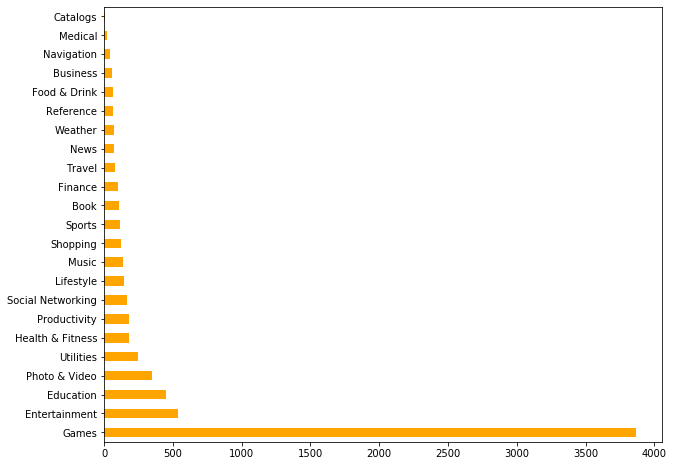

In [5]:
data['prime_genre'].value_counts().plot(kind='barh', figsize=(10,8), color='orange')

# Given that the data has a lot of categories, I will be creating a Dataframe and limit it to categories that have atleast 100 mobile apps.  

In [6]:
query1='''
        SELECT 
        track_name,
        price,
        prime_genre
        FROM MobileApps
        WHERE prime_genre IN
        (
            SELECT
            prime_genre 
            FROM MobileApps
            GROUP BY prime_genre
            HAVING Count(*) >= 100
        )
        
            '''
Top_100=pd.read_sql_query(query1, conn)
Top_100

,track_name,price,prime_genre
0,PAC-MAN Premium,3.99,Games
1,Evernote - stay organized,0.00,Productivity
2,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,Shopping
3,Shanghai Mahjong,0.99,Games
4,PayPal - Send and request money safely,0.00,Finance
...,...,...,...
6701,Kubik,0.00,Games
6702,VR Roller-Coaster,0.00,Games
6703,Bret Michaels Emojis + Lyric Keyboard,1.99,Utilities
6704,VR Roller Coaster World - Virtual Reality,0.00,Games


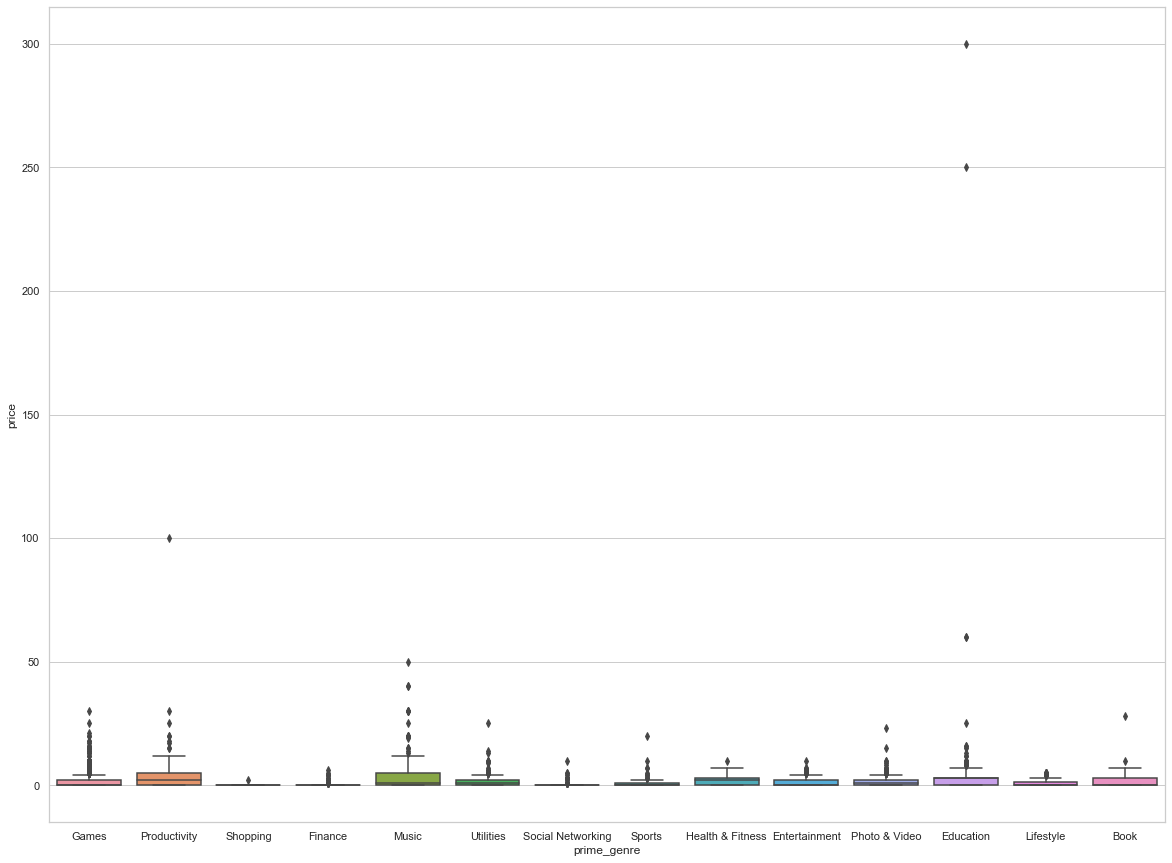

In [7]:
# Import seaborn and use it to create a box plot - which will allow us to do a quick and easy visualisation of: 
# Ranges and Distribution
# Summary Statistics like Averages, Max and Minimums
# Quick spotlight on the outliers

sns.set(style="whitegrid", rc={'figure.figsize':(20,15)},)
ax = sns.boxplot(x=Top_100.prime_genre, y=Top_100.price, data=Top_100, orient="v" )

Insights: 
1. Most of the outlier apps in terms of pricing can be seen more in the Education category
2. Shopping, Finance and Social networking apps cost less
3. Most of the apps maintain a certain level of pricing. This could be an indicator of average pricing that leads to a succesful mobile application. 

# Pricing

A look at pricing because I would like to understand how pricing is distributed across these apps and the ratio of paid to unpaid apps in each of these categories. 

1. So, what are the most expensive mobile apps we have on Playtsore and just why are they that expensive? Let's look out for patterns

In [8]:
query2='''
            SELECT 
            prime_genre,
            SUM
                (
                    CASE WHEN price == 0 
                    THEN 1 
                    ELSE 0 
                    END
                ) AS Free_Apps, 
            SUM
                (
                    CASE WHEN price != 0
                    THEN 1 
                    ELSE 0 
                    END
                ) AS Paid_Apps, 
            count() as Total
            FROM MobileApps  
            GROUP BY prime_genre
            ORDER BY Total DESC
            LIMIT 10
        '''
Free_vs_paid=pd.read_sql_query(query2, conn)
Free_vs_paid

,prime_genre,Free_Apps,Paid_Apps,Total
0,Games,2257,1605,3862
1,Entertainment,334,201,535
2,Education,132,321,453
3,Photo & Video,167,182,349
4,Utilities,109,139,248
5,Health & Fitness,76,104,180
6,Productivity,62,116,178
7,Social Networking,143,24,167
8,Lifestyle,94,50,144
9,Music,67,71,138


[Text(0, 0.5, 'Number of Mobile Apps'), Text(0.5, 0, 'Mobile Apps Categories')]

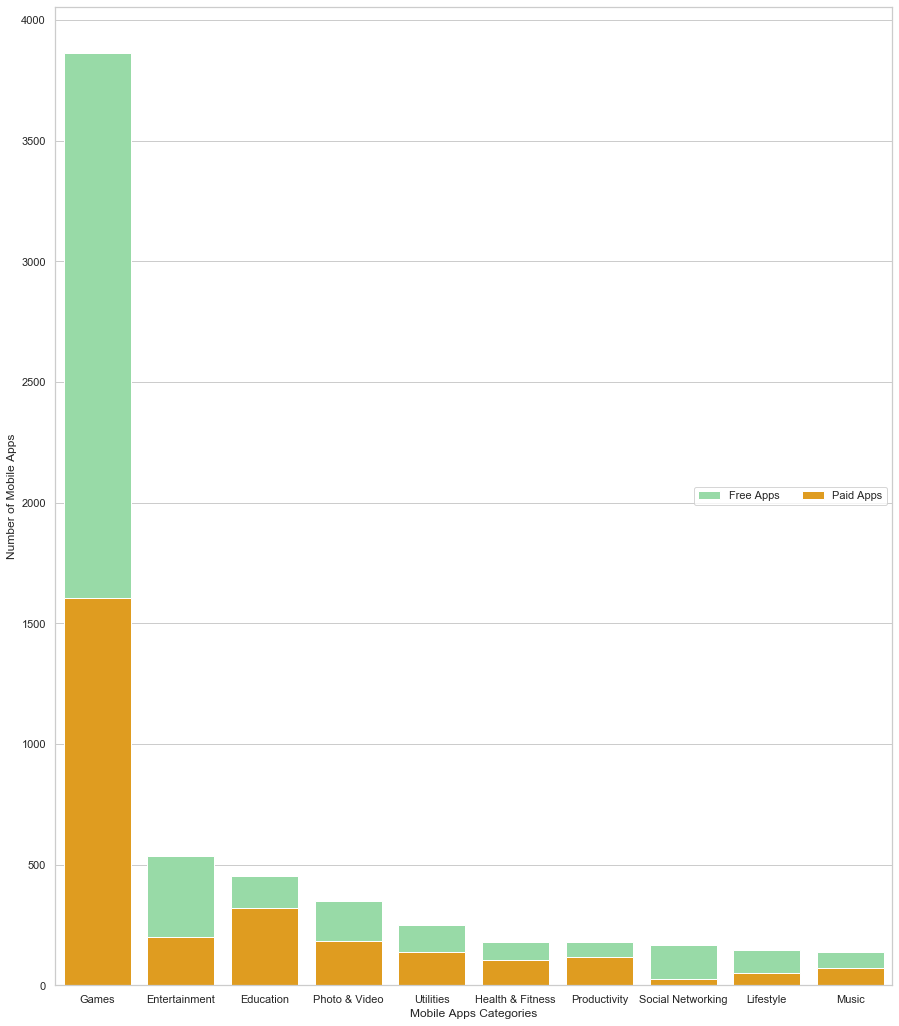

In [9]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 18))

# No need to load the above dataset as it has already been loaded and assigned. 

# Plot the total number of applications
sns.set_color_codes("pastel")
sns.barplot(x=Free_vs_paid.prime_genre, y=Free_vs_paid.Total, data=Free_vs_paid, label="Free Apps", color="g")

# Plot the apps that are paid for
sns.set_color_codes("muted")
sns.barplot(x =Free_vs_paid.prime_genre, y=Free_vs_paid.Paid_Apps, data=Free_vs_paid, label="Paid Apps", color="orange")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right")
ax.set(xlabel="Mobile Apps Categories", ylabel="Number of Mobile Apps")


Insights:

1. This graph reinforces the box plot findings where the Education category not only has some of the most expensive apps on the App store but cumulatively as a category, contains more paid apps than free ones. 
2. The Games category has most applications and maintains a healthy balance between paid and free applications
3. The Social networking, Lifestyle and Entertainment categories have more free apps than paid apps whereas the Education and Productivity categories have more paid apps than free ones. This is definetly because these applications have different rationales of how they create, deliver and capture value (i.e business models). 


# What is the relationship between the price of apps versus the ratings they get?

In [10]:
query3='''
        SELECT
        track_name,
        user_rating,
        prime_genre, 
            (
                CASE 
                WHEN price == 0 
                THEN 'Free' 
                ELSE 'Paid' 
                END
            )
                AS Pricing_Category
        FROM MobileApps
        WHERE prime_genre IN
        (
            SELECT
            prime_genre 
            FROM MobileApps
            GROUP BY prime_genre
            HAVING Count(*) >= 100
        )
        '''
df3=pd.read_sql_query(query3, conn)
df3

,track_name,user_rating,prime_genre,Pricing_Category
0,PAC-MAN Premium,4.0,Games,Paid
1,Evernote - stay organized,4.0,Productivity,Free
2,"eBay: Best App to Buy, Sell, Save! Online Shop...",4.0,Shopping,Free
3,Shanghai Mahjong,4.0,Games,Paid
4,PayPal - Send and request money safely,4.0,Finance,Free
...,...,...,...,...
6701,Kubik,4.5,Games,Free
6702,VR Roller-Coaster,4.5,Games,Free
6703,Bret Michaels Emojis + Lyric Keyboard,4.5,Utilities,Paid
6704,VR Roller Coaster World - Virtual Reality,4.5,Games,Free


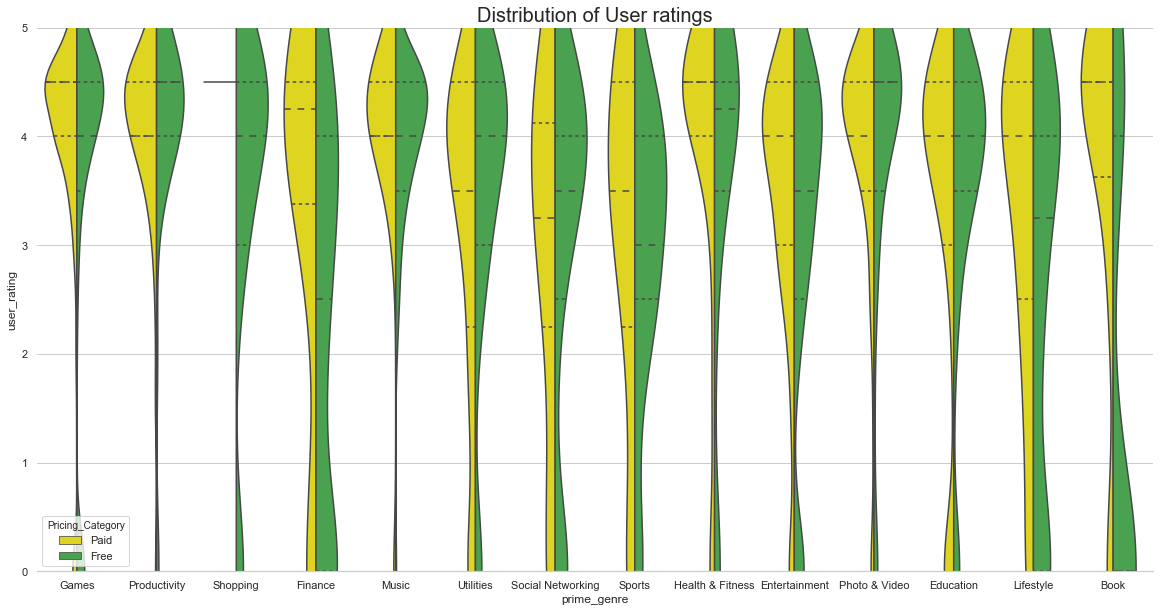

In [39]:

plt.figure(figsize=(20,10))
plt.style.use('fast')
#Because ratings on App Store are between 0 and 5
plt.ylim([0,5])
plt.title("Distribution of User ratings", fontsize=20)

Diagram3= sns.violinplot(x=df3.prime_genre, y=df3.user_rating, hue=df3.Pricing_Category, split=True, inner="quart",
                         palette=['#fff200','#3bb143'], data=df3)
sns.despine(left=True)

Insights: 

1. Apps in the Shopping category are mostly free and dont seem to register a lot of poor ratings (Below 3)
2. Apps that fall into the Finance, Lifestyle, Book and Sports categories register the most low ratings. This insight can help unravel opportunities in the Mobile App Sphere. For example, if we make the assumption that low ratings signify weak value propositions or poor customer relationships, there's market opportunity to create apps in these categories that can be succesful with stronger value propositions and great customer relationships. 
3. Apps in the Productivity, Games,Music and Photo and Video have an even ratings distribution for both paid and unpaid and therefore if anyone might need to create an app in these categories, differentiation might be needed to ensure the app excels.  

# The most popular apps

In [55]:
query4='''
            SELECT 
            track_name, 
            prime_genre,
            user_rating, 
            rating_count_ver, 
            rating_count_tot
            FROM MobileApps
            WHERE user_rating==5.0 AND price==0 AND rating_count_tot >100000 AND prime_genre!='Games'
            ORDER BY rating_count_tot DESC
            '''
pd.read_sql_query(query4, conn)

,track_name,prime_genre,user_rating,rating_count_ver,rating_count_tot
0,Domino's Pizza USA,Food & Drink,5.0,2481,258624
1,Flashlight Ⓞ,Utilities,5.0,1010,130450
2,Pic Collage - Picture Editor & Photo Collage M...,Photo & Video,5.0,1521,123433
3,"Zappos: shop shoes & clothes, fast free shipping",Shopping,5.0,39452,103655
4,"Credit Karma: Free Credit Scores, Reports & Al...",Finance,5.0,181,101679


In [95]:
query5='''
            SELECT 
            track_name, 
            prime_genre,
            user_rating,
            cont_rating,
            rating_count_ver, 
            rating_count_tot
            FROM MobileApps
            WHERE user_rating ==5.0 AND price!=0 AND rating_count_tot >100000
            ORDER BY rating_count_tot DESC
            '''
pd.read_sql_query(query5, conn)

,track_name,prime_genre,user_rating,cont_rating,rating_count_ver,rating_count_tot
0,Plants vs. Zombies,Games,5.0,9+,680,426463
1,Infinity Blade,Games,5.0,12+,177050,326482
2,Geometry Dash,Games,5.0,4+,6263,266440
3,Plants vs. Zombies HD,Games,5.0,9+,503,163598
4,The Room,Games,5.0,9+,1056,143908


In [96]:
query6='''
            SELECT 
            track_name,
            price,
            prime_genre,
            user_rating,
            cont_rating,
            rating_count_ver, 
            rating_count_tot
            FROM MobileApps
            WHERE (prime_genre=='Social Networking' OR prime_genre=='Music') AND user_rating >=4.5 AND price==0
            ORDER BY rating_count_tot DESC
            LIMIT 20
            '''
pd.read_sql_query(query6, conn)

,track_name,price,prime_genre,user_rating,cont_rating,rating_count_ver,rating_count_tot
0,Pinterest,0.0,Social Networking,4.5,12+,1814,1061624
1,Spotify Music,0.0,Music,4.5,12+,8253,878563
2,WhatsApp Messenger,0.0,Social Networking,4.5,4+,73088,287589
3,"ooVoo – Free Video Call, Text and Voice",0.0,Social Networking,4.5,4+,1014,177501
4,Viber Messenger – Text & Call,0.0,Social Networking,4.5,4+,206,164249
5,Magic Piano by Smule,0.0,Music,4.5,4+,1102,131695
6,Smule Sing!,0.0,Music,4.5,9+,33,119316
7,Followers - Social Analytics For Instagram,0.0,Social Networking,4.5,4+,139,112778
8,TuneIn Radio - MLB NBA Audiobooks Podcasts Music,0.0,Music,4.5,12+,370,110420
9,Amazon Music,0.0,Music,4.5,4+,4605,106235


I was curious to see how the apps on my phone are perfoming compared to the rest and therefore decided to look some of them up. I am particularly interested in knowing more about: 

1. Spotify
2. Pleo
3. Slack
4. RNI Films
5. Books
6. Instagram
7. MobilePay
8. Tinder
9. Reddit
10. Scandinavia Standard

In [94]:
query7='''
            SELECT 
            track_name,
            price,
            prime_genre,
            user_rating, 
            rating_count_ver, 
            rating_count_tot
            FROM MobileApps
            WHERE 
                track_name=='Tinder' OR 
                track_name =='Instagram' OR 
                track_name LIKE '%Reddit%'OR
                track_name LIKE '%podcast%'
            '''
pd.read_sql_query(query7, conn)

,track_name,price,prime_genre,user_rating,rating_count_ver,rating_count_tot
0,TuneIn Radio Pro - MLB Audiobooks Podcasts Music,9.99,Music,4.5,99,71609
1,"Audible – audio books, original series & podcasts",0.00,Book,4.5,1774,105274
2,Instagram,0.00,Photo & Video,4.5,1289,2161558
3,TuneIn Radio - MLB NBA Audiobooks Podcasts Music,0.00,Music,4.5,370,110420
4,PodCruncher podcast app - Player and manager f...,2.99,News,4.5,689,2261
5,Tinder,0.00,Lifestyle,3.5,114,143040
6,Reddit Official App: All That's Trending and V...,0.00,News,4.5,1442,67560
